In [1]:
# https://www.christopherlovell.co.uk/blog/2016/04/27/h5py-intro.html

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML

In [3]:
plt.rcParams['figure.figsize'] = (6.6,4.4)
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.bbox'] = 'tight'

In [4]:
f = h5py.File('shearing_curr_res_7.5_dt_1.0_T_600_U_1.0exp(0.2z)+0.05_psi_30_smax_10_0_surf3d.hdf5', 'r')

In [5]:
list(f.keys())

['DSV_00',
 'DSV_01',
 'DSV_02',
 'DSV_03',
 'DSV_04',
 'DSV_05',
 'DSV_06',
 'U',
 'Uk',
 'eta',
 'k',
 'rad_im_10_HH',
 'rad_im_10_VV',
 'rad_im_28_HH',
 'rad_im_28_VV',
 'rad_im_45_HH',
 'rad_im_45_VV',
 't',
 'x',
 'y',
 'z']

In [6]:
k = f.get('k')

In [7]:
k = np.array(k)

In [8]:
eta = f.get('eta')

In [9]:
thing = np.array(eta)
et_t_0 = thing[0]
et_t_0

array([[ 0.3188747 , -0.051571  , -0.19134583, ..., -0.61840206,
        -0.45398623, -0.367469  ],
       [ 0.20896323, -0.35599038, -0.5280668 , ..., -0.42741668,
        -0.41712007, -0.406138  ],
       [ 0.21958362, -0.2579806 , -0.63820916, ..., -0.3204471 ,
        -0.3593373 , -0.22888723],
       ...,
       [-0.23685099, -0.35268968, -0.25271463, ...,  0.46847686,
         0.41217268,  0.2466789 ],
       [-0.21208242, -0.4628403 , -0.4743927 , ...,  0.21041556,
         0.04162848,  0.13339517],
       [ 0.05637982, -0.13221158, -0.35909912, ...,  0.19136415,
        -0.07946533,  0.01488742]], dtype=float32)

## 1) Current Profile 

In [10]:
z = f.get('z')

In [11]:
z = np.array(z)
z

array([-20.        , -19.7979798 , -19.5959596 , -19.39393939,
       -19.19191919, -18.98989899, -18.78787879, -18.58585859,
       -18.38383838, -18.18181818, -17.97979798, -17.77777778,
       -17.57575758, -17.37373737, -17.17171717, -16.96969697,
       -16.76767677, -16.56565657, -16.36363636, -16.16161616,
       -15.95959596, -15.75757576, -15.55555556, -15.35353535,
       -15.15151515, -14.94949495, -14.74747475, -14.54545455,
       -14.34343434, -14.14141414, -13.93939394, -13.73737374,
       -13.53535354, -13.33333333, -13.13131313, -12.92929293,
       -12.72727273, -12.52525253, -12.32323232, -12.12121212,
       -11.91919192, -11.71717172, -11.51515152, -11.31313131,
       -11.11111111, -10.90909091, -10.70707071, -10.50505051,
       -10.3030303 , -10.1010101 ,  -9.8989899 ,  -9.6969697 ,
        -9.49494949,  -9.29292929,  -9.09090909,  -8.88888889,
        -8.68686869,  -8.48484848,  -8.28282828,  -8.08080808,
        -7.87878788,  -7.67676768,  -7.47474747,  -7.27

In [12]:
U = f.get('U')

In [13]:
U = np.array(U)
U

array([0.06831564, 0.06907082, 0.06985713, 0.07067587, 0.07152837,
       0.07241601, 0.07334025, 0.07430261, 0.07530464, 0.07634798,
       0.07743434, 0.0785655 , 0.0797433 , 0.08096965, 0.08224658,
       0.08357615, 0.08496054, 0.08640201, 0.08790291, 0.0894657 ,
       0.09109293, 0.09278725, 0.09455143, 0.09638834, 0.098301  ,
       0.10029252, 0.10236615, 0.10452528, 0.10677343, 0.10911428,
       0.11155164, 0.1140895 , 0.116732  , 0.11948345, 0.12234835,
       0.12533137, 0.12843739, 0.13167147, 0.1350389 , 0.13854517,
       0.14219601, 0.14599738, 0.14995549, 0.15407679, 0.15836802,
       0.16283619, 0.16748858, 0.1723328 , 0.17737675, 0.18262867,
       0.18809713, 0.19379107, 0.19971977, 0.20589293, 0.21232061,
       0.21901332, 0.22598197, 0.23323795, 0.24079311, 0.24865977,
       0.25685079, 0.26537953, 0.27425993, 0.28350648, 0.29313428,
       0.30315904, 0.31359714, 0.32446561, 0.33578221, 0.34756541,
       0.35983445, 0.37260935, 0.38591098, 0.39976106, 0.41418

Text(0.5, 1.0, 'Current Depth Profile')

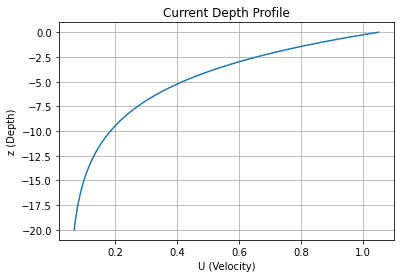

In [14]:
plt.plot(U,z)

plt.grid(True)
plt.xlabel('U (Velocity)')
plt.ylabel('z (Depth)')
plt.title('Current Depth Profile')
 

## 2) Surface Elevation

In [15]:
eta = f.get('eta')

In [16]:
eta = np.array(eta)

In [17]:
eta

array([[[ 0.3188747 , -0.051571  , -0.19134583, ..., -0.61840206,
         -0.45398623, -0.367469  ],
        [ 0.20896323, -0.35599038, -0.5280668 , ..., -0.42741668,
         -0.41712007, -0.406138  ],
        [ 0.21958362, -0.2579806 , -0.63820916, ..., -0.3204471 ,
         -0.3593373 , -0.22888723],
        ...,
        [-0.23685099, -0.35268968, -0.25271463, ...,  0.46847686,
          0.41217268,  0.2466789 ],
        [-0.21208242, -0.4628403 , -0.4743927 , ...,  0.21041556,
          0.04162848,  0.13339517],
        [ 0.05637982, -0.13221158, -0.35909912, ...,  0.19136415,
         -0.07946533,  0.01488742]],

       [[-0.02522024, -0.01897904, -0.03870581, ...,  0.00308467,
          0.05296471,  0.1361032 ],
        [-0.00766731, -0.05350234, -0.0428537 , ..., -0.4114969 ,
         -0.31924137, -0.19018398],
        [ 0.09891742, -0.38407376, -0.5005019 , ..., -0.34741926,
         -0.34158313, -0.24280623],
        ...,
        [ 0.13938859,  0.41906053,  0.5270646 , ...,  

In [18]:
x = f.get('x')
y = f.get('y')

In [19]:
x = np.array(x)
y = np.array(y)

### When T = 0

In [20]:
et_t_0 = eta[0]
et_t_0
# when time = 0

array([[ 0.3188747 , -0.051571  , -0.19134583, ..., -0.61840206,
        -0.45398623, -0.367469  ],
       [ 0.20896323, -0.35599038, -0.5280668 , ..., -0.42741668,
        -0.41712007, -0.406138  ],
       [ 0.21958362, -0.2579806 , -0.63820916, ..., -0.3204471 ,
        -0.3593373 , -0.22888723],
       ...,
       [-0.23685099, -0.35268968, -0.25271463, ...,  0.46847686,
         0.41217268,  0.2466789 ],
       [-0.21208242, -0.4628403 , -0.4743927 , ...,  0.21041556,
         0.04162848,  0.13339517],
       [ 0.05637982, -0.13221158, -0.35909912, ...,  0.19136415,
        -0.07946533,  0.01488742]], dtype=float32)

In [21]:
index, = np.where(x == 5)
index
# Value of x in the middle of data set
# corresponds to x = 5

array([34], dtype=int64)

In [22]:
eta_t0_x5 = et_t_0[:,34]
# Gets the 34th column in data matrix 

Text(0.5, 1.0, 'Free Surface Profile when T=0 at Slice x=5')

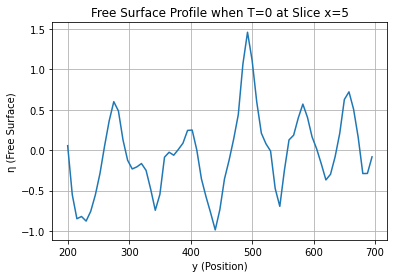

In [23]:
plt.plot(y,eta_t0_x5)

plt.grid(True)
plt.xlabel('y (Position)')
plt.ylabel('η (Free Surface)')
plt.title('Free Surface Profile when T=0 at Slice x=5')


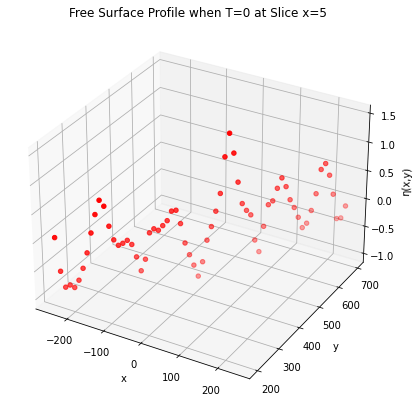

In [24]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, eta_t0_x5, color = "red")
plt.title("Free Surface Profile when T=0 at Slice x=5")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('η(x,y)')
 
# show plot
plt.show()

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


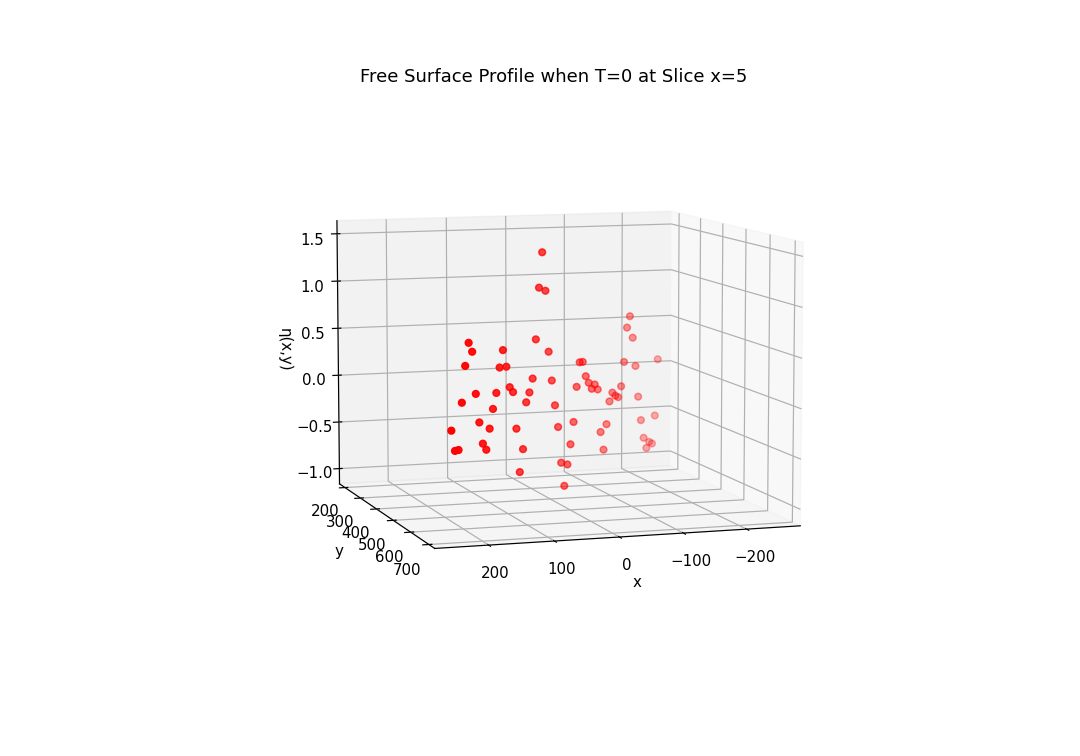

In [26]:
%matplotlib inline  
%matplotlib notebook
%pylab

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, eta_t0_x5, color = "red")
plt.title("Free Surface Profile when T=0 at Slice x=5")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('η(x,y)')
 
# show plot
plt.show()

<ipython-input-28-07a479f83a9b>:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


Text(0.5, 0.92, 'Original Code')

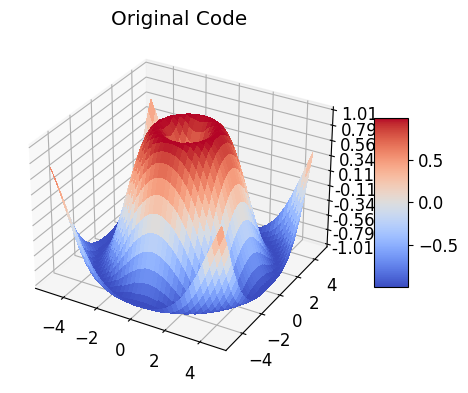

In [28]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Original Code')

<ipython-input-29-4dd1fb2f0128>:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


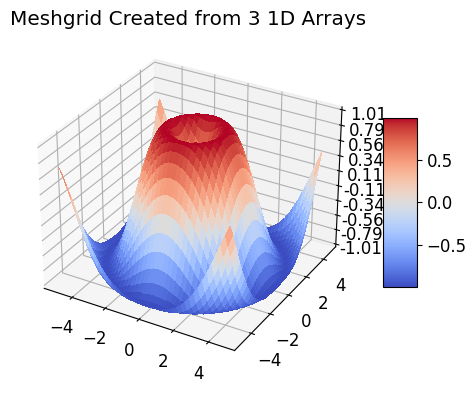

In [29]:
# ~~~~ MODIFICATION TO EXAMPLE BEGINS HERE ~~~~ #
import pandas as pd
from scipy.interpolate import griddata
# create 1D-arrays from the 2D-arrays
x = X.reshape(1600)
y = Y.reshape(1600)
z = Z.reshape(1600)
xyz = {'x': x, 'y': y, 'z': z}

# put the data into a pandas DataFrame (this is what my data looks like)
df = pd.DataFrame(xyz, index=range(len(xyz['x']))) 

# re-create the 2D-arrays
x1 = np.linspace(df['x'].min(), df['x'].max(), len(df['x'].unique()))
y1 = np.linspace(df['y'].min(), df['y'].max(), len(df['y'].unique()))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((df['x'], df['y']), df['z'], (x2, y2), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Meshgrid Created from 3 1D Arrays')
# ~~~~ MODIFICATION TO EXAMPLE ENDS HERE ~~~~ #

plt.show()

In [30]:
len(z_points)

67

In [31]:
eta_t0_x5

array([ 0.05611447, -0.5507103 , -0.8477658 , -0.8202979 , -0.87676275,
       -0.7559356 , -0.5536261 , -0.2897461 ,  0.05067304,  0.36267883,
        0.60031444,  0.4862796 ,  0.1270852 , -0.12429849, -0.23193835,
       -0.20647782, -0.16507192, -0.24936777, -0.4822278 , -0.7429887 ,
       -0.5462631 , -0.0862976 , -0.02539223, -0.06203584,  0.009457  ,
        0.08674379,  0.2446661 ,  0.24904878,  0.00284571, -0.35317585,
       -0.57526964, -0.774393  , -0.98618937, -0.7356881 , -0.35684738,
       -0.12467299,  0.13834621,  0.4403568 ,  1.0654291 ,  1.4592297 ,
        1.1102848 ,  0.59735566,  0.2103217 ,  0.07932105, -0.01102657,
       -0.4734355 , -0.6946633 , -0.2477623 ,  0.12754494,  0.18532425,
        0.39757404,  0.5701805 ,  0.4064791 ,  0.16421074,  0.01535519,
       -0.169726  , -0.36750156, -0.29759628, -0.07964464,  0.20906676,
        0.62733865,  0.7218148 ,  0.50673676,  0.15954833, -0.28890997,
       -0.2876254 , -0.08224502], dtype=float32)

## When T = 1

In [32]:
et_t_1 = eta[1]
et_t_1
# when time = 1

array([[-0.02522024, -0.01897904, -0.03870581, ...,  0.00308467,
         0.05296471,  0.1361032 ],
       [-0.00766731, -0.05350234, -0.0428537 , ..., -0.4114969 ,
        -0.31924137, -0.19018398],
       [ 0.09891742, -0.38407376, -0.5005019 , ..., -0.34741926,
        -0.34158313, -0.24280623],
       ...,
       [ 0.13938859,  0.41906053,  0.5270646 , ...,  0.25925386,
         0.34423435,  0.11668242],
       [-0.12703113, -0.122667  ,  0.08215402, ...,  0.29276308,
         0.3579793 ,  0.15853676],
       [-0.22630936, -0.3567526 , -0.19567634, ...,  0.07427777,
        -0.00834213,  0.12570266]], dtype=float32)

In [33]:
eta_t1_x5 = et_t_1[:,34]
# Gets the 34th column in data matrix 

In [34]:
plt.plot(y,eta_t1_x5)

plt.grid(True)
plt.xlabel('y (Position)')
plt.ylabel('η (Free Surface)')
plt.title('Free Surface Profile when T=1 at Slice x=5')

ValueError: x and y must have same first dimension, but have shapes (1600,) and (67,)

You can see there is a different between the middle slice of the data cube at T = 0 and at T = 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sample data (replace this with your actual data)
data = []  # List to store data for each time step

# Generate sample data (replace with your actual data)
for t in range(600):
    time_step = []
    for i in range(67):
        x = -250 + i * 7.5  # Replace this with your actual x data
        y = 200  # Fixed y value
        z = data[t][i]  # Replace this with your actual z data
        time_step.append((x, y, z))
    data.append(time_step)

# Extract z values at x = 5 for all time steps
x_slice = 5  # Desired x value

z_values = [time_step[i][2] for time_step in data]

# Create a figure and axis for the plot
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

# Set the axis limits
ax.set_xlim(0, 600)
ax.set_ylim(min(z_values), max(z_values))
ax.set_xlabel('Time')
ax.set_ylabel('Z Value')

# Function to initialize the plot
def init():
    line.set_data([], [])
    return line,

# Function to update the plot for each frame
def update(frame):
    z = [data[frame][i][2] for i in range(len(data[frame])) if data[frame][i][0] == x_slice]
    line.set_data(range(frame), z[:frame])
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(data), init_func=init, blit=True)

from IPython.display import HTML
HTML(ani.to_jshtml())


In [35]:
x = f.get('x')
y = f.get('y')
t = f.get('t')
z_data = f.get('')

In [36]:
x = np.array(x)
y = np.array(y)
t = np.array(t)

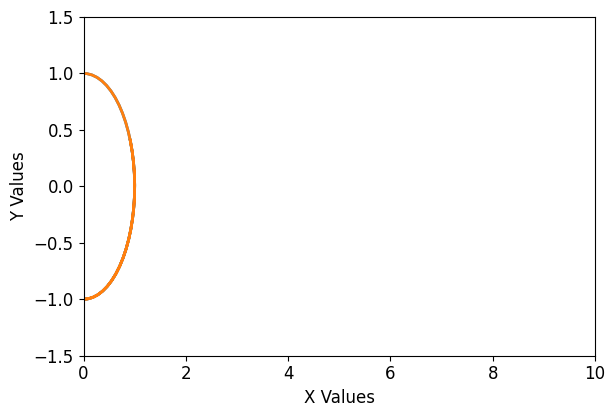

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sample data (replace this with your own data)
num_times = 21  # Number of time steps
x_data = []  # List to store x data for each time step
y_data = []  # List to store y data for each time step

for t in range(num_times):
    time = np.arange(0, 10, 0.1)
    x = np.sin(time + t)  # Modify this to fit your data
    y = np.cos(time + t)  # Modify this to fit your data
    x_data.append(x)
    y_data.append(y)

# Create a figure and axis for the plot
fig, ax = plt.subplots()
line_x, = ax.plot([], [], lw=2, label='x')
line_y, = ax.plot([], [], lw=2, label='y')

# Set the axis limits
ax.set_xlim(0, 10)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel('X Values')
ax.set_ylabel('Y Values')

# Function to initialize the plot
def init():
    line_x.set_data([], [])
    line_y.set_data([], [])
    return line_x, line_y

# Function to update the plot for each frame
def update(frame):
    line_x.set_data(x_data[frame], y_data[frame])
    line_y.set_data(x_data[frame], y_data[frame])
    return line_x, line_y

# Create the animation
ani = FuncAnimation(fig, update, frames=num_times, init_func=init, blit=True)

from IPython.display import HTML
HTML(ani.to_jshtml())


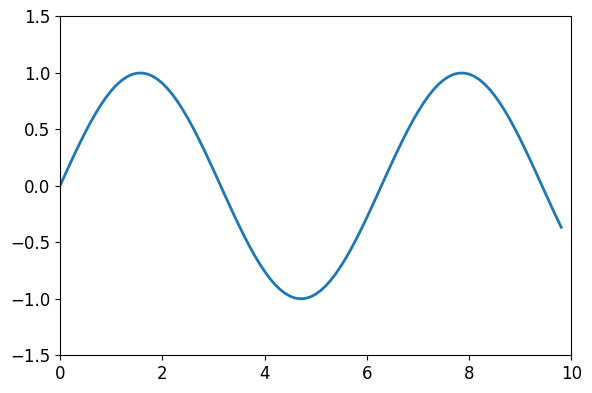

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sample data (replace this with your own data)
time = np.arange(0, 10, 0.1)
x = np.sin(time)
y = np.cos(time)

# Create a figure and axis for the plot
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

# Set the axis limits
ax.set_xlim(0, 10)
ax.set_ylim(-1.5, 1.5)

# Function to initialize the plot
def init():
    line.set_data([], [])
    return line,

# Function to update the plot for each frame
def update(frame):
    line.set_data(time[:frame], x[:frame])  # Modify this line for the 'y' data
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(time), init_func=init, blit=True)

from IPython.display import HTML
HTML(ani.to_jshtml())


In [ ]:
z_t0_y207_5 = et_t_0[1]
# z values when T=0 at the slice y=207.5

In [ ]:
plt.plot(x,z_t0_y207_5)

plt.grid(True)
plt.xlabel('x (Position)')
plt.ylabel('η (Free Surface)')
plt.title('Free Surface Profile when T=0 @ Slice y=207.5')

In [ ]:
z_t0_y695 = et_t_0[66]
# z values when T=0 at the slice y=207.5

In [ ]:
plt.plot(x,z_t0_y695)

plt.grid(True)
plt.xlabel('x (Position)')
plt.ylabel('η (Free Surface)')
plt.title('Free Surface Profile when T=0 @ Slice y=695')

## When T = 1

In [67]:
et_t_1 = eta[1]
et_t_1
# when time = 1

array([[-0.02522024, -0.01897904, -0.03870581, ...,  0.00308467,
         0.05296471,  0.1361032 ],
       [-0.00766731, -0.05350234, -0.0428537 , ..., -0.4114969 ,
        -0.31924137, -0.19018398],
       [ 0.09891742, -0.38407376, -0.5005019 , ..., -0.34741926,
        -0.34158313, -0.24280623],
       ...,
       [ 0.13938859,  0.41906053,  0.5270646 , ...,  0.25925386,
         0.34423435,  0.11668242],
       [-0.12703113, -0.122667  ,  0.08215402, ...,  0.29276308,
         0.3579793 ,  0.15853676],
       [-0.22630936, -0.3567526 , -0.19567634, ...,  0.07427777,
        -0.00834213,  0.12570266]], dtype=float32)

In [ ]:
z_t1_y200 = et_t_1[0]
# z values when T=1 at the slice y=200

In [ ]:
plt.plot(x,z_t1_y200)

plt.grid(True)
plt.xlabel('x (Position)')
plt.ylabel('η (Free Surface)')
plt.title('Free Surface Profile when T=1 @ Slice y=200')